<a href="https://colab.research.google.com/github/RealMyeong/Aiffel_Exploration/blob/main/EX_BS2_project15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step1. 검증용 데이터셋 준비
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.  

​
가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.
​


## Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)
위 두 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.

### Keras-ocr, pre-trained 모델 사용해서 한글 뽑아보기

In [ ]:
# !pip uninstall tensorflow
# !pip uninstall keras
# !pip install tensorflow==2.6.0
# !pip install keras==2.6.0

In [2]:
import tensorflow as tf

2.6.0


In [9]:
!pip install -q keras-ocr

In [10]:
import keras_ocr
import matplotlib.pyplot as plt

In [11]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [14]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
img_path = [
  '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/SImple Food Menus Preview.jpeg',
  '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/ashwini-chaudhary-monty-XDhke8ZQoZg-unsplash.jpg',
  '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/drew-beamer-Vc1pJfvoQvY-unsplash.jpg',
  '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/gabriel-bassino-zEawlLdVloo-unsplash.jpg',
  '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/glen-carrie-oHoBIbDj7lo-unsplash.jpg',
  '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/jonathan-francisca-_JHfot1DW8o-unsplash.jpg',
  '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/noah-black-0r7Rxh7-IlM-unsplash.jpg',
  '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/sarah-ardin-9kZ-u3jeSaA-unsplash.jpg',
]

images = [ keras_ocr.tools.read(url) for url in img_path]
prediction_groups = [pipeline.recognize([url]) for url in img_path]

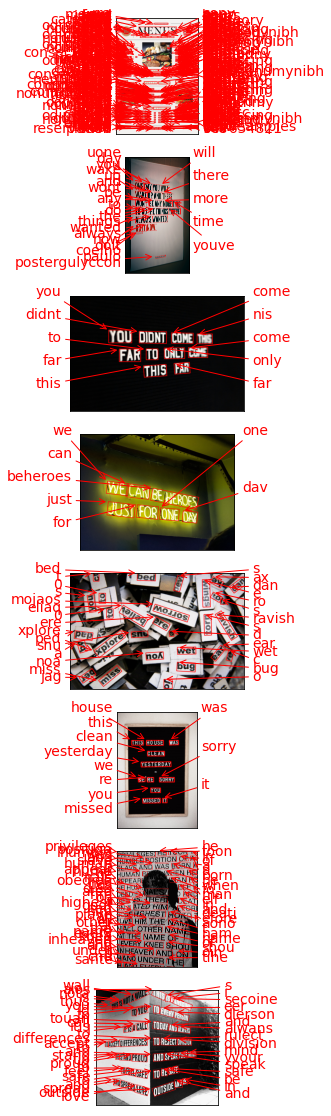

In [15]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 6, 6, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 512)         1180160   
                                                                 
 flatten_9 (Flatten)         (None, 8192)             

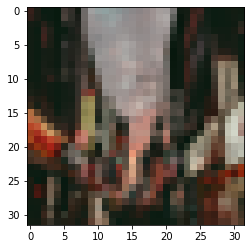

In [16]:

# -*- coding: utf-8 -*-
"""
Created on Thu May 28 16:48:33 2020
@author: 원기
"""
import numpy as np
import json
import matplotlib.pylab as plt
import sys
sys.path.append('/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/kor_model/')
from PIL import Image
from keras import models, layers

def test_Image(addr,table):
    T_Image = Image.open(addr)
    T_Image = T_Image.resize((32,32))
    T_Image_Array = np.array(T_Image,'uint8')
    plt.imshow(T_Image_Array)
    T_Image_Array = T_Image_Array.reshape(1,32,32,3)
    a = CNN.predict(T_Image_Array)
    b = np.argmax(a,axis=1)
    print('예측한 음절: ',table[str(b[0])])

CNN = models.load_model('/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/kor_model/Korean_CNN_model(97.8).h5')
with open('/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/kor_model/index_to_syllable(97.8).json','r',encoding='utf-8') as f:
    index_to_syllable = json.load(f)
CNN.summary()

T_Image_1_addr = '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/korean_1.jpg'
test_Image(T_Image_1_addr,index_to_syllable)

예측한 음절:  빪


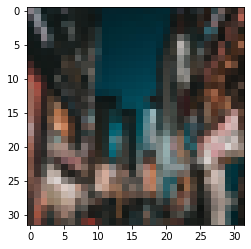

In [17]:
T_Image_2_addr = '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/korean_2.jpg'
test_Image(T_Image_2_addr,index_to_syllable)

keras-ocr 한글 인식하는 모델이 있다고 해서 가져와봤는데 이게 한글 손글씨를 인식하는 모델이어서 이미지를 주면 예상되는 문자 하나를 줘서 예상과는 다른 결과가 나옴

### 태서랙트 써보기

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract


In [ ]:
!sudo apt install tesseract-ocr-kor


In [ ]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img'
img_file_path ='/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/SImple Food Menus Preview.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

In [9]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

Mec) Ei

RF STA URAN

MENU

Sas

4PM .1.AM

3b

| RE

on a

‘5

| €C AF

é

rN

Y

CULE

&

UN,

ee

- ()O)T)

(ALTE GORY

<()C)T)

(CATEGORY

ANTE TE

$5

FOOD NAME HERE

Vile bo

HERE

lk Hk

am

eHERE

+ €)0)T)

\

HERE

v5

tL Ores

re POL

1 dolor


Orne?

CN iS

| orers

1 Asa

dolor

ose

one?

*)e> a

fetuer OaIpiscing

elit,

Sod

on

tetuer adipiscing

eit,

cod

roles

POTsrre ry

nibs

euisrnoOd

PeOviurririy

nibh

ePLIseNOG

+ €)0)T)

NAT

be ithe


Ss

i«( )C)1>}

NAAT

‘HERE

Ss

Rein

re pots

Y dolor

jr

omer,

(anise.

| Oren

1 PATS

Aolor

cs

Cre?

(tore

PCTucr

Caipiscing

elit

cod

aan

tetuer adipiscing

cht,

cod

darn

ROTM ri

y niDt

euismod

PeQviueririny

nibh

CLIsENOG

iH O)0)T)

NAS

i ie

&

S>

(CDT)

NAS

SD

L Ores

re ious

) dolor


ore,


| orers

1 Asie

dolor

SaF

ones,

LOreerw

iwitiwa

OGIpiscINng

elit,

<a

own

reru

한 줄씩 출력하는 게 불편해서 그냥 리스트에 넣고 리스트로 바로 출력하게 바꿔줌

In [12]:
work_dir = '/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img'
img_file_path ='/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/ashwini-chaudhary-monty-XDhke8ZQoZg-unsplash.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0000.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0001.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0002.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0003.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0004.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0005.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0006.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0007.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0008.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0009.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0010.png
/content/drive/MyDrive/AIFFEL/EX/15.OCR(문자를 읽는 딥러닝)/crop_img/0

In [14]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    text_list=[]
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        text_list.append(recognized_data['text'].strip())
    print(text_list)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

['ONE', 'DAY', 'YOU', 'W', 'AK', '|', 'AND', 'THERE', "WON'T", 'BF', 'ANY', '', 'T|ME', 'If', 'Nf)', 'THE', 'THINGS', 'YON Ve', '| WAYS', 'WANTED,', '0', '|', 'NOW.', '']


​
​
## Step3. 테스트 결과 정리
모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.


## Step4. 결과 분석과 결론 제시
우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다. 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다. 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.